# Random Numbers and Histograms



##Random Numbers
The submodule **random** in NumPy contains several methods to implement random functions for several probability distribution.
The **rand(n)** function creates an array of n (float) numbers uniformly distributed on the interval from 0 to 1.
The **randn(n)** function produces a standard normal (Gauss) distribution of n random numbers with a mean of 0 and a standard deviation of 1.
After having imported the methods (numpy and so on -see below), try: 

```
# rand()
# rand(3)
```

## Histograms in Python

To plot histograms we will use the **plt.hist** function.The function will calculate the range of your data and create a number of equally spaced bins.
It is important to find the optimal bin size to understand the probability distribution represented by the histogram. Infact if we choose a bin size too large, all our data will in extreme fall in one single bar. On the other hand, if we choose a bin size too small, we will just observe statistical changes in the measured quantity. If you don't specify with the 'bin' keyword, **plt.hist** tries to optimize the bin size.

The keyword **align** is for default align='mid', so the bars will be centered on the midpoint of each bin.
The keyword **ec** allows to visualize a vertical line between the bars.


With the assignments:
```
# counts,bin_edges,_=plt.hist(data)
```

you can then print counts and bin edges.


In [ ]:
# As usual, we abbreviate numpy as np, scipy as sp and matplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = (10,5) # size of figure
plt.rcParams['font.size'] = 16    # fonsize of the text
plt.rcParams['legend.fontsize'] = 14  # set fontsize of the legend


To use the random functions in the **random** submodule we make an exception to our usual way of importing functions and import directly the functions we will use. So it will be possible to refer to them only by calling them.

In [ ]:
from numpy.random import rand, randn  

**Example:** Generate two random numbers with rand()

Consult help(rand) for  more info.

In [ ]:
rand(2)

array([0.54476493, 0.77070988])

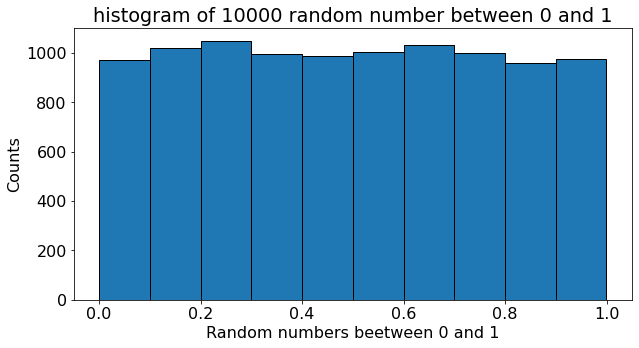

In [ ]:
# generate 10000 uniformly distributed numbers  with rand function
randomuniform = rand(10000)  
# With Python we can unpack the return values of a function. In the following we apply the feature of multiple assignments introducing counts, bin_edges_rest variables
counts,bin_edges,*rest=plt.hist(randomuniform,ec='black') # here we create an histogram , the keyword ec allows to create vertical line of 'black' colour separating the bars
plt.title("histogram of 10000 random number between 0 and 1") 
plt.xlabel('Random numbers beetween 0 and 1')
plt.ylabel('Counts')
#plt.grid(True)
plt.show()


You can print the counts and the bin edges of the previous histogram using the following code:

In [ ]:
print("Counts=",counts)
print("Bin Edges=",bin_edges)

Counts= [ 972. 1022. 1049.  995.  988. 1006. 1032. 1002.  959.  975.]
Bin Edges= [6.92128400e-05 1.00049335e-01 2.00029456e-01 3.00009578e-01
 3.99989700e-01 4.99969822e-01 5.99949944e-01 6.99930065e-01
 7.99910187e-01 8.99890309e-01 9.99870431e-01]


**Example:** 
Change the number of bins in the above histogram, by using the keyword: 'bins'. You can specify the number of bins like: bins=50, or the list [ ] of bin edges.

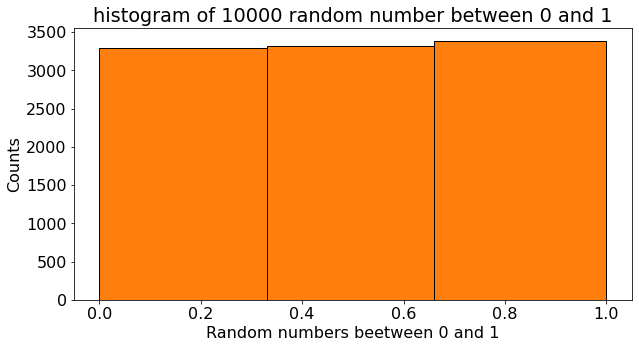

In [ ]:
# Solution
# generate 10000 uniformly distributed numbers  with rand function
randomuniform = rand(10000)  
# With Python we can unpack the return values of a function. In the following we apply the feature of multiple assignments introducing counts, bin_edges_rest variables
counts,bin_edges,*rest=plt.hist(randomuniform,ec='black') # here we create an histogram , the keyword ec allows to create vertical line of 'black' colour separating the bars
plt.hist(randomuniform, bins=[0,0.33,0.66,1],ec='black')   # in this line we specify as an example the bins we want to consider
#plt.hist(randomuniform, bins=3,ec='black') 
plt.title("histogram of 10000 random number between 0 and 1") 
plt.xlabel('Random numbers beetween 0 and 1')
plt.ylabel('Counts')
#plt.grid(True)
plt.show()

In the following, we create numbers which are distributed like a Gaussian.

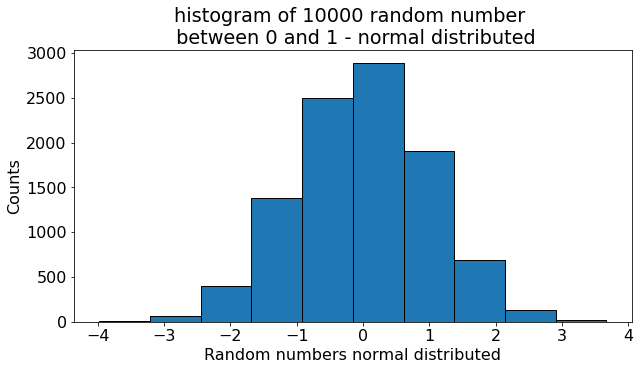

In [ ]:
# Gaussian distributed numbers   
N=10000  # number of numbers
gaussrandom = randn(N)
plt.hist(gaussrandom, ec='black') # here we create an histogram
plt.title("histogram of 10000 random number \n between 0 and 1 - normal distributed") 
plt.xlabel('Random numbers normal distributed')
plt.ylabel('Counts')
#plt.grid(True)
plt.show()

### To display the **relative** frequencies on the y-axis, without importing other packages we can us the keyword 'weights' in plt.hist function:


0.09998955007959487
0.09998955007959487


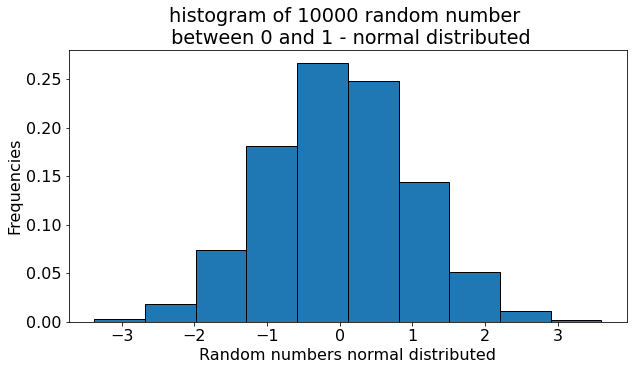

In [ ]:
# Gaussian distributed numbers   
N=10000  # number of numbers
gaussrandom = randn(N)
plt.hist(gaussrandom, ec='black',weights=np.ones_like(gaussrandom) /len(gaussrandom)) # here we create an histogram; np.ones_like creates an array of ones
plt.title("histogram of 10000 random number \n between 0 and 1 - normal distributed") 
plt.xlabel('Random numbers normal distributed')
plt.ylabel('Frequencies')
#plt.grid(True)
print(bin_edges[1]-bin_edges[0])
print(bin_edges[2]-bin_edges[1])
plt.show()

## Use of histograms to analyse the measurements of the period of a pendulum
In the rest of this Notebook we will show an example of use of histograms to analyse the measurements of the period of a pendulum.
In particular we want to answer the question if it is more precise to measure the period of a pendulum by starting/stopping a stop watch when the mass of the pendulum has its maximum velocity ($v_{max}$) or when it has is minumun velocity ($v_{min}$, which is equal to zero). 
To answer this question we use the PhET simulation of a pendulum. This simulation was developed by the team at the university Colorado Boulder as shown in the picture below and can be found here: [PhET simulation pendulum](https://phet.colorado.edu/sims/html/pendulum-lab/latest/pendulum-lab_en.html). 



We consider a pendulum of lenght L=1m oscillating with an amplitude of 5° without air friction. Such a situation is represented in the image below. Note that in the image below the mass is in the position of minimum (zero) velocity. It will reach the maximun velocity by the dashed vertical line. 

Using this simulation, we measured 100 times a single period when the mass is at $v_{max}$ and 100 times at $v_{min}$. The data are in the files 'Pendel_v_min' and 'Pendel_v_max'.


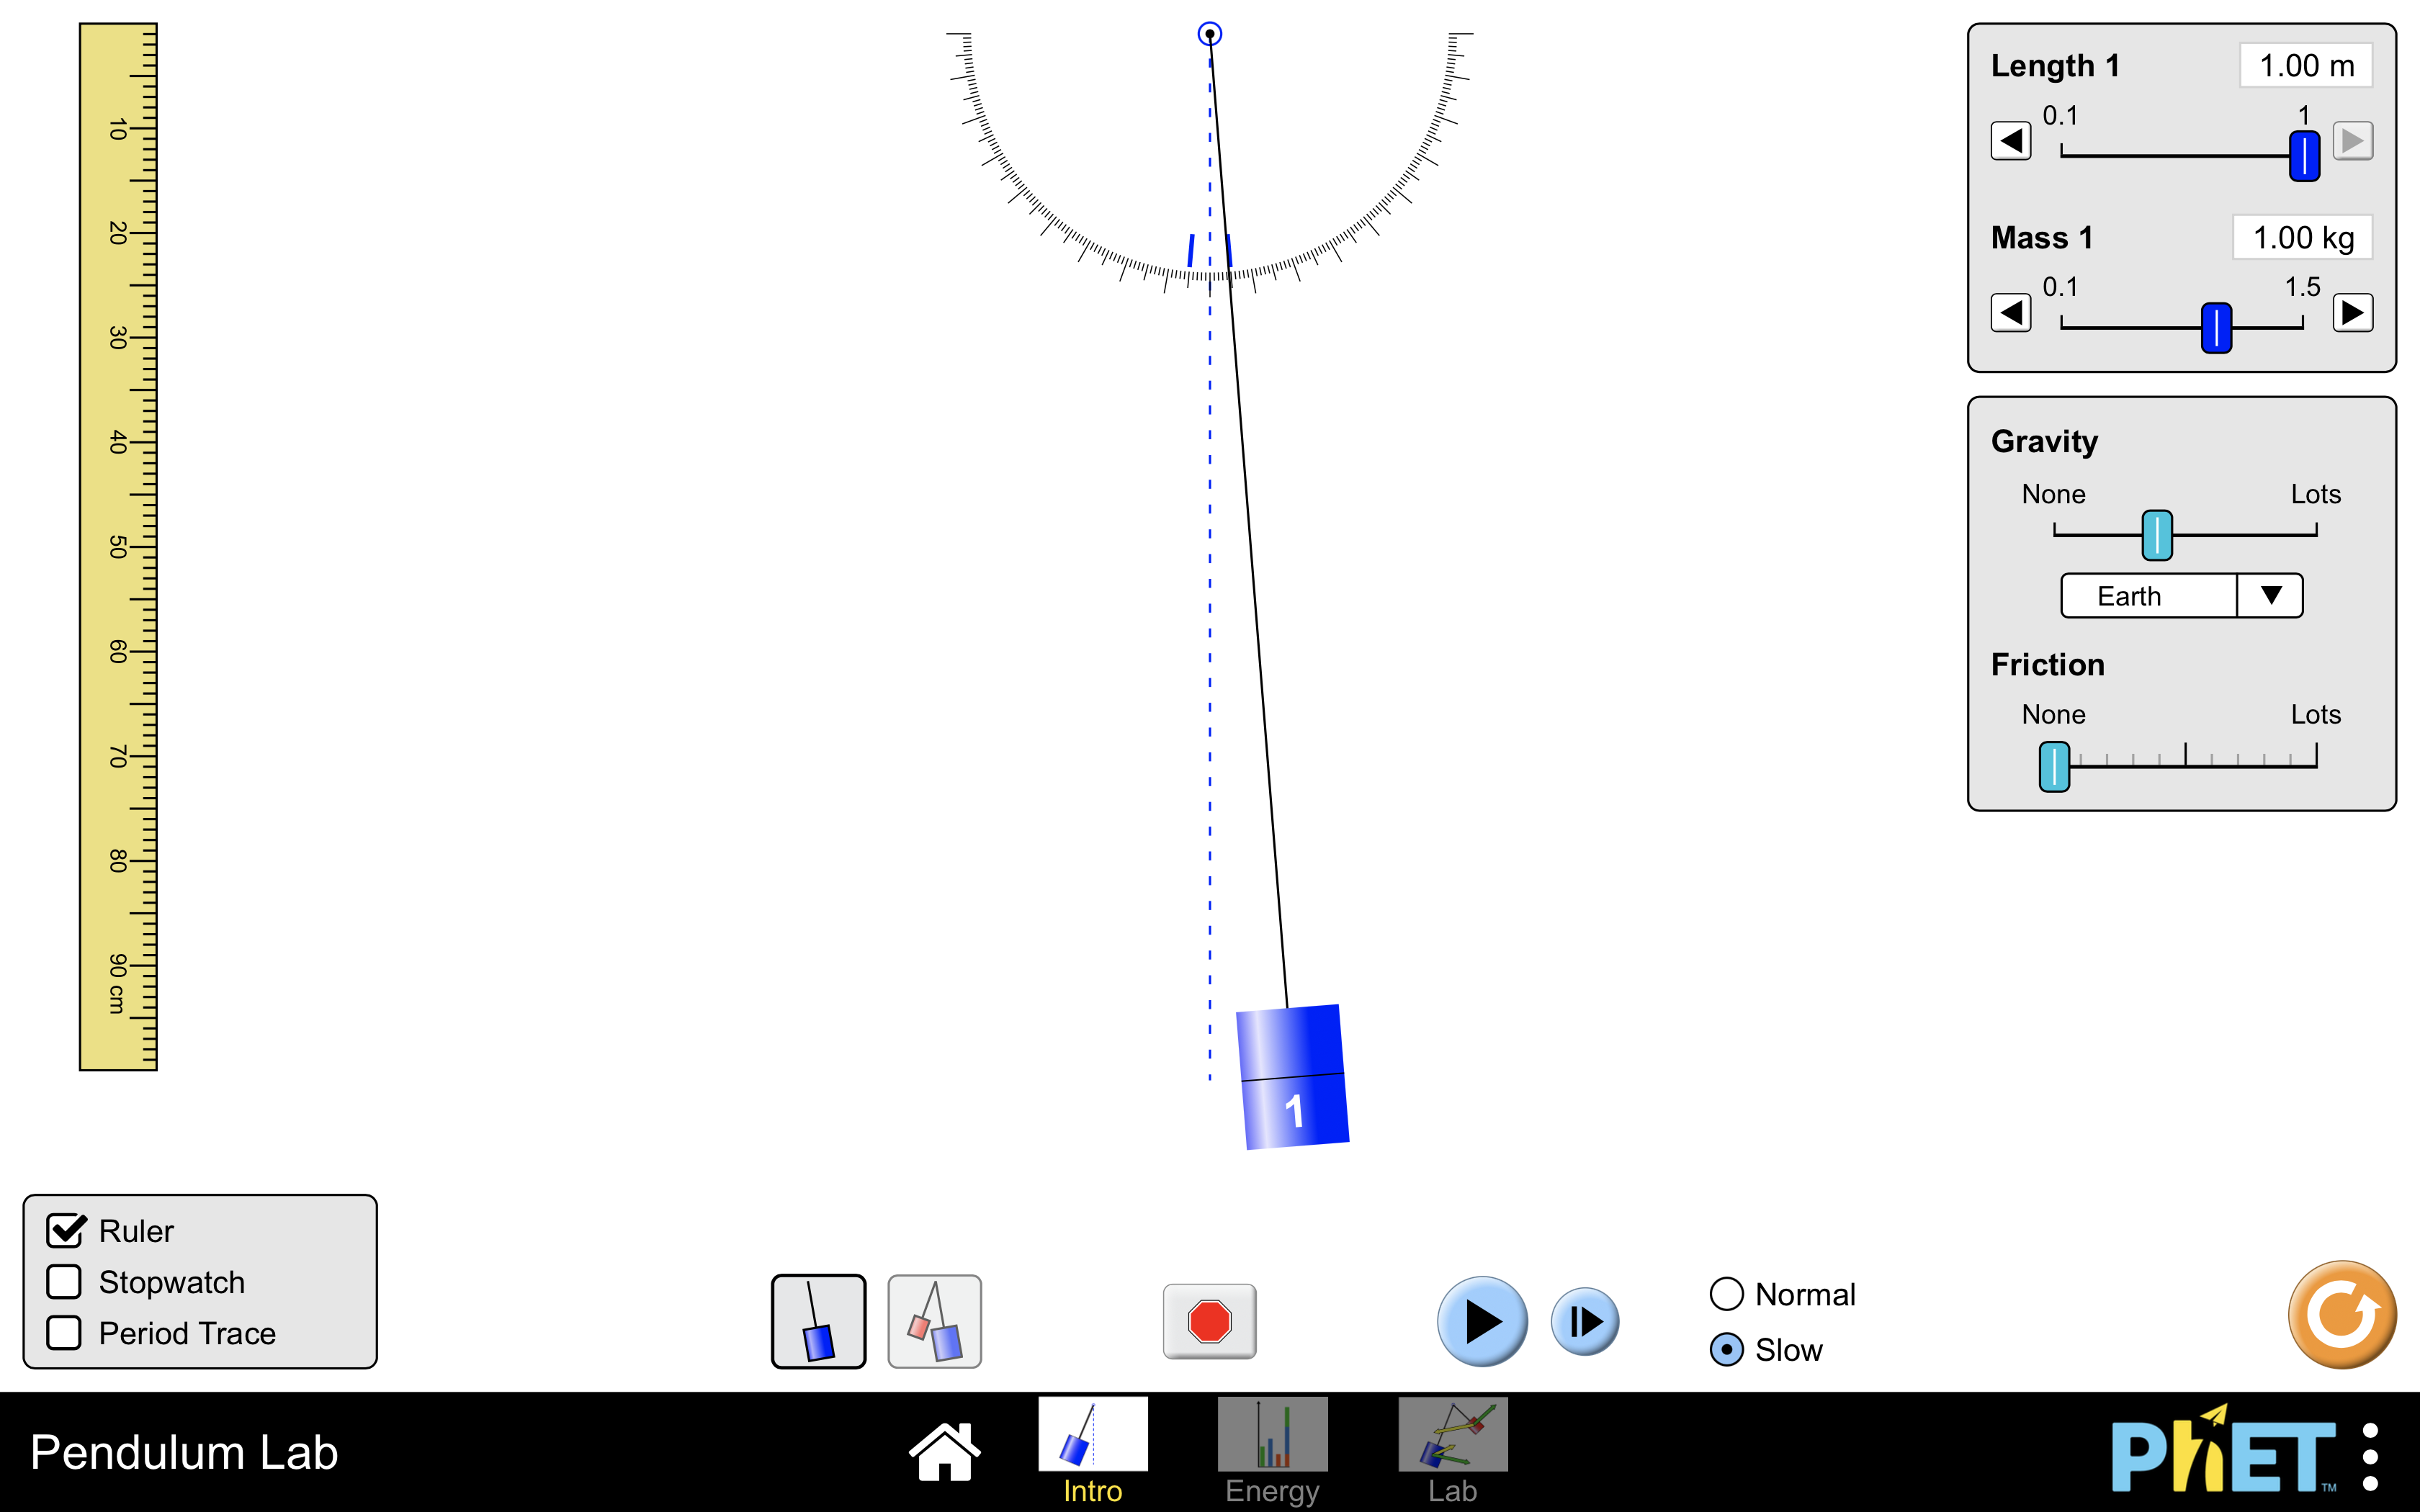

To answer our question, we will import and plot both files using histogramms.

If you use Google Colab you can import the data taken at $v_{max}$ and $v_{min}$ using the following codes. If you use Anaconda skip the following three codes.

In [ ]:
import os    # import the os library to interact with the operative system
print(os.getcwd()) # print the workimng directory

/content


In [ ]:
 from google.colab import files
 import io
uploaded=files.upload()


Saving Pendel_v_max.txt to Pendel_v_max.txt


In [ ]:
df1=pd.read_csv("Pendel_v_max.txt", sep="\t", header=None) 

If you use Anaconda use this code here for importing the data:
````
df1=pd.read_csv("/Users/micolalemani/Pendel_v_max.txt", sep="\t", header=None) 
`````


In [ ]:
df1.head()

,0,1
0,1,1952
1,2,1992
2,3,1906
3,4,1975
4,5,1976


Here we want to print the names of the columns:

In [ ]:
df1.columns

Int64Index([0, 1], dtype='int64')

We first plot the raw data here:

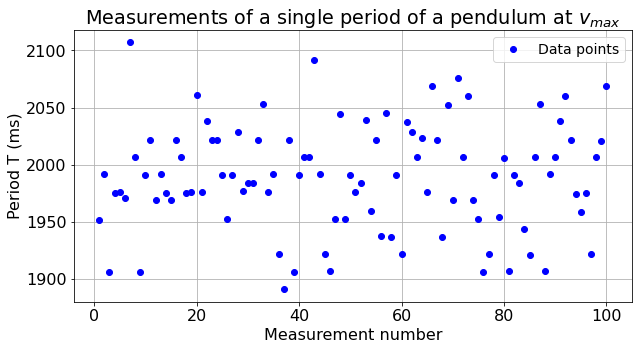

In [ ]:
plt.plot(df1[0],df1[1], 'bo', label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Measurement number')
plt.ylabel('Period T (ms)')
plt.title("Measurements of a single period of a pendulum at $v_{max}$")
plt.show()

We then create an histogram of the data here:

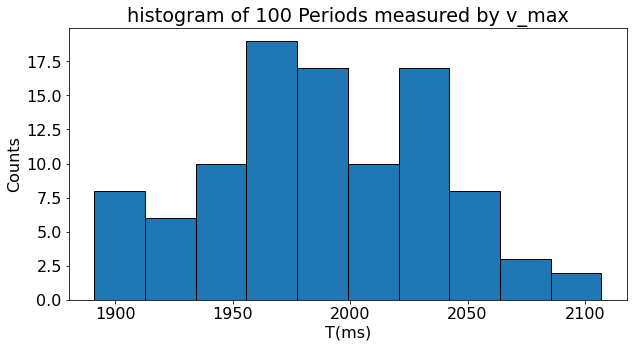

In [ ]:
plt.hist(df1[1],ec='black') # here we create an histogram
plt.title("histogram of 100 Periods measured by v_max") 
plt.xlabel('T(ms)')
plt.ylabel('Counts')
plt.show()

Now we analyse the measurements at $v_{min}$ and do the same as we did above for the data taken at $v_{max}$.

In [ ]:
from google.colab import files
import io
uploaded=files.upload()

Saving Pendel_v_min.txt to Pendel_v_min.txt


In [ ]:
df2=pd.read_csv("Pendel_v_min.txt", sep="\t", header=None) 

Again here if you use Anaconda use skip the above codes and use this:
```
df2=pd.read_csv("/Users/micolalemani/Pendel_v_min.txt", sep="\t", header=None) 
````


Now we assing the data in the first column to Count2 and the data in the second column to Period2:

In [ ]:
Count2 = df2[0] 
Period2 = df2[1]

And we plot the data:

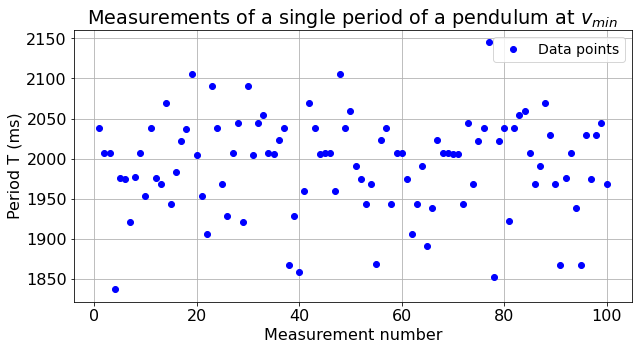

In [ ]:
plt.plot(df2[0],df2[1], 'bo', label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Measurement number')
plt.ylabel('Period T (ms)')
plt.title("Measurements of a single period of a pendulum at $v_{min}$")
plt.show()

Here we create an histogram for the data taken at $v_{min}$:

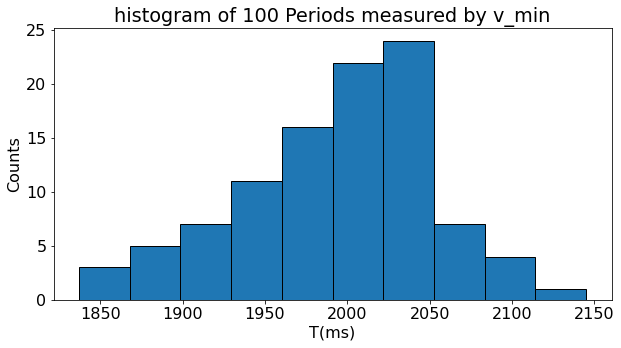

In [ ]:
plt.hist(df2[1], ec='black') # here we create an histogram
plt.title("histogram of 100 Periods measured by v_min") 
plt.xlabel('T(ms)')
plt.ylabel('Counts')
plt.show()

We notice that the ranges of the x axis in the two graph are different. We want to modify the x axis of the first histogram, so that both graphs have the same range in the x axis. We do this in the following code:

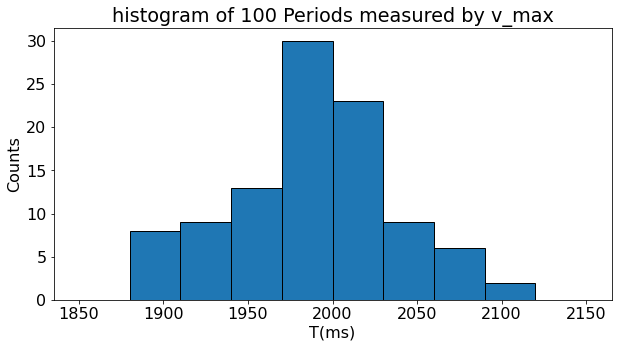

In [ ]:
plt.hist(df1[1], range=[1850, 2150], ec='black') # here we create an histogram
plt.title("histogram of 100 Periods measured by v_max") 
plt.xlabel('T(ms)')
plt.ylabel('Counts')
plt.show()

Considering that the number of measurements (N=100) is not particularly high, we argue that in both cases the histograms resemble those of Gauss distributed data. We can also see that the histogram for measurements taken at $v_{max}$ is narrower than the one with measurements taken by $v_{min}$.
To analyse this differences further we plot the probability density functions and use a Gauss fit to estimate the width of the histograms. From the fit we will obtain the values of the mean and standard deviation for both cases.

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# Make the normal distribution fit the data for measurements at v_max: 
mu, std = norm.fit (df1[1]) # mean and standard deviation

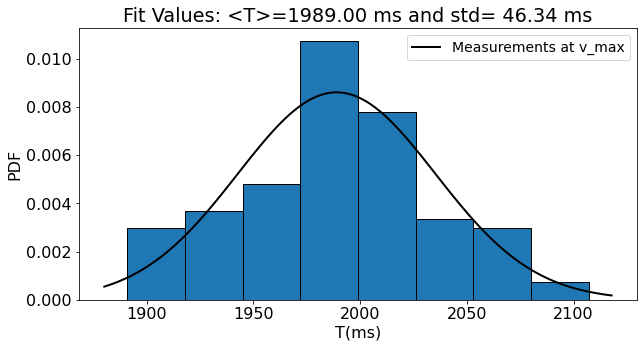

In [ ]:
# Plot the histogram for measurements at v_max.
plt.hist(df1[1], bins=8, density=True, ec='black')  # qui si usa il parametro density che ho citato sopra. è da verificare perché dà risultati diversi rispetto a weight
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, label='Measurements at v_max')
plt.xlabel('T(ms)')
plt.ylabel('PDF')   # MODIFICARE TESTO
title = "Fit Values: <T>={:.2f} ms and std= {:.2f} ms".format(mu, std)
plt.legend()
plt.title(title)
  
plt.show()

In [ ]:
# Make the normal distribution fit the data for measurements at v_min: 
mu2, std2 = norm.fit (df2[1]) # mean and standard deviation

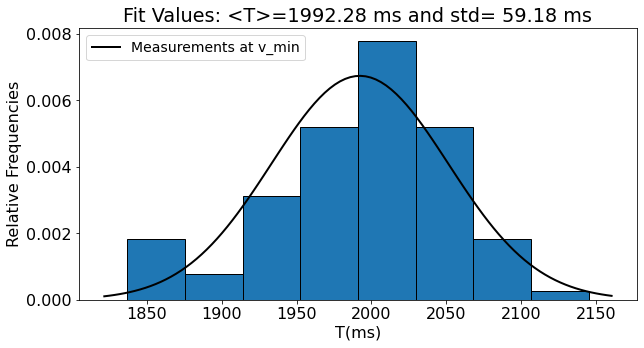

In [ ]:
# Plot the histogram for measurements at v_min.
plt.hist(df2[1], bins=8, density=True, ec='black')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu2, std2)
  
plt.plot(x, p, 'k', linewidth=2, label='Measurements at v_min')
plt.xlabel('T(ms)')
plt.ylabel('Relative Frequencies')
title = "Fit Values: <T>={:.2f} ms and std= {:.2f} ms".format(mu2, std2)
plt.legend()
plt.title(title)
  
plt.show()

By looking at the last two graphs, we clearly see that the Gauss distribution that fits the data taken at $v_{max}$ is narrower than the one for data taken at $v_{min}$. 

This result let us conclude, that it is more precise to measure the period of a pendulum by starting/stopping a stop watch when the mass of the pendulum has its maximum velocity ($v_{max}$) rather than when it is at its minumun velocity ($v_{min}$).

Now the question is why?
Try to find the answer to this question and document your thoughts at the end of this notebook.